# Bit Plane Splicing

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

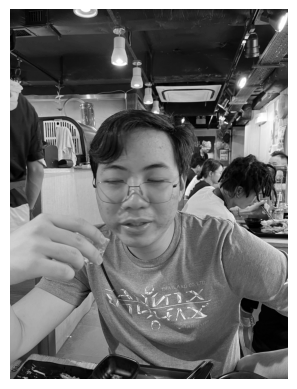

Shape: (4032, 3024)


In [47]:
PATH = "../image processing/image.png"
image = cv2.imread(PATH, 0)

plt.imshow(image, cmap = "gray")
plt.axis("off")
plt.show()

original_shape = image.shape
print("Shape:", original_shape)

## Splitting Image into Bit Planes

In [20]:
# split image into 8 bit planes
bit_planes = []
for i in range(8):
    bit_planes.append(image % 2)
    image = image // 2

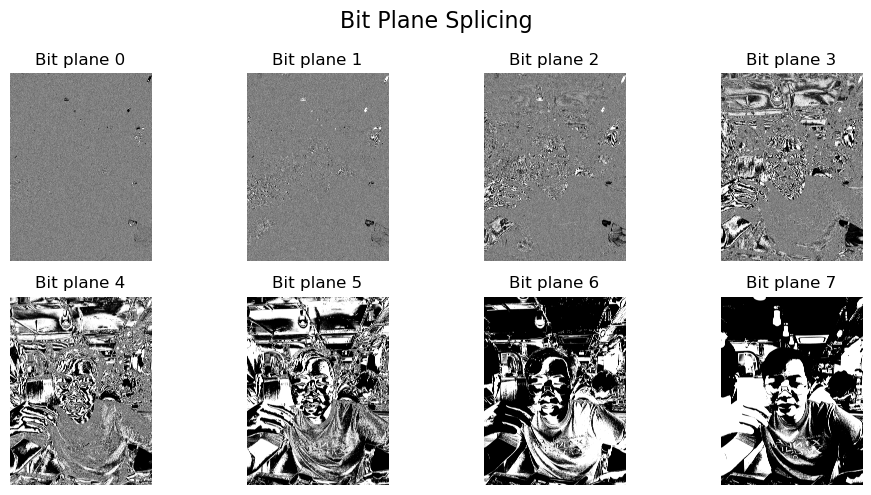

In [32]:
# plot bit planes
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
fig.suptitle("Bit Plane Splicing", fontsize = 16)
for i in range(8):
    axes[i//4, i%4].imshow(bit_planes[i], cmap="gray")
    axes[i//4, i%4].set_title("Bit plane {}".format(i))
    axes[i//4, i%4].axis("off")

plt.tight_layout()
plt.show()


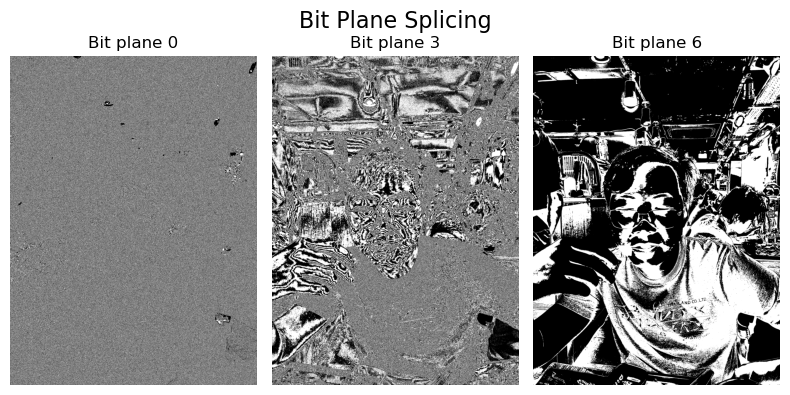

In [45]:
fig, axes = plt.subplots(1, 3, figsize = (8, 4))
fig.suptitle("Bit Plane Splicing", fontsize = 16)
for i in range(3):
    axes[i].imshow(bit_planes[3*i], cmap = "gray")
    axes[i].set_title("Bit plane {}".format(3*i))
    axes[i].axis("off")
plt.tight_layout()
plt.show()

# Digital Watermark

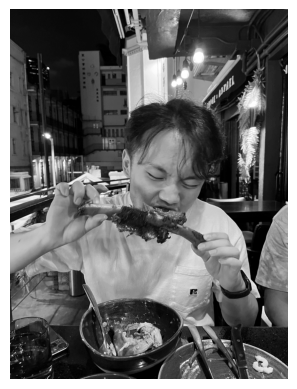

Shape: (4032, 3024)


In [51]:
PATH_NEW = "../image processing/sam.png"
new_image = cv2.imread(PATH_NEW, 0)

plt.imshow(new_image, cmap = "gray")
plt.axis("off")
plt.show()
print("Shape:", image.shape)